# Russell Rebalance Strategy

In [8]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

import activity as act
import available as avb
import utils as self_utils
from quantified_strategies import strategy_utils as utils

In [3]:
START = dt.date(2020, 1, 1)
END = dt.date.today()

## Rules

1. Buy on the close of the first trading day after the 23rd of June.
2. Sell on the close of the first trading day of July.

In [4]:
TICKER = "IWM"

In [5]:
results = self_utils.run(ticker=TICKER, full=True, start=START, end=END)
results

{}
remove api from here


,asset,ret,ret_shifted,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,
2020-01-02,157.2637,NaN,-0.003921,False,-0.0,0.000000,-0.003921,False,0
2020-01-03,156.6471,-0.003921,0.001332,False,0.0,0.000000,-0.002594,False,0
2020-01-06,156.8558,0.001332,-0.003326,False,-0.0,0.000000,-0.005911,False,0
2020-01-07,156.3341,-0.003326,0.003095,False,0.0,0.000000,-0.002835,False,0
2020-01-08,156.8179,0.003095,0.001210,False,0.0,0.000000,-0.001628,False,0
...,...,...,...,...,...,...,...,...,...
2024-02-27,204.0000,0.014169,-0.008235,False,-0.0,0.045051,0.286502,False,4
2024-02-28,202.3200,-0.008235,0.006969,False,0.0,0.045051,0.295467,False,4
2024-02-29,203.7300,0.006969,0.010602,False,0.0,0.045051,0.309202,False,4


In [9]:
data = utils.get_data(ticker=TICKER, columns="Adj Close").to_frame(name="asset")
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data = self_utils.run(data=data, full=True)

{}
remove api from here


In [10]:
trade_ret = data.dropna(subset="strat_ret").groupby("trade_number")["strat_ret"].apply(lambda ret: utils.get_cumulative_return(returns=ret, total=True))
trade_ret.index = trade_ret.index.map(data.loc[data["enter_flag"]].reset_index().set_index("trade_number")["Date"].to_dict())
trade_ret = trade_ret.loc[~trade_ret.index.isna()]
trade_ret.head(5)

trade_number
2020-06-23   -0.004196
2021-06-23    0.002318
2022-06-23    0.017664
2023-06-23    0.028854
Name: strat_ret, dtype: float64

## Plot Strategy Results

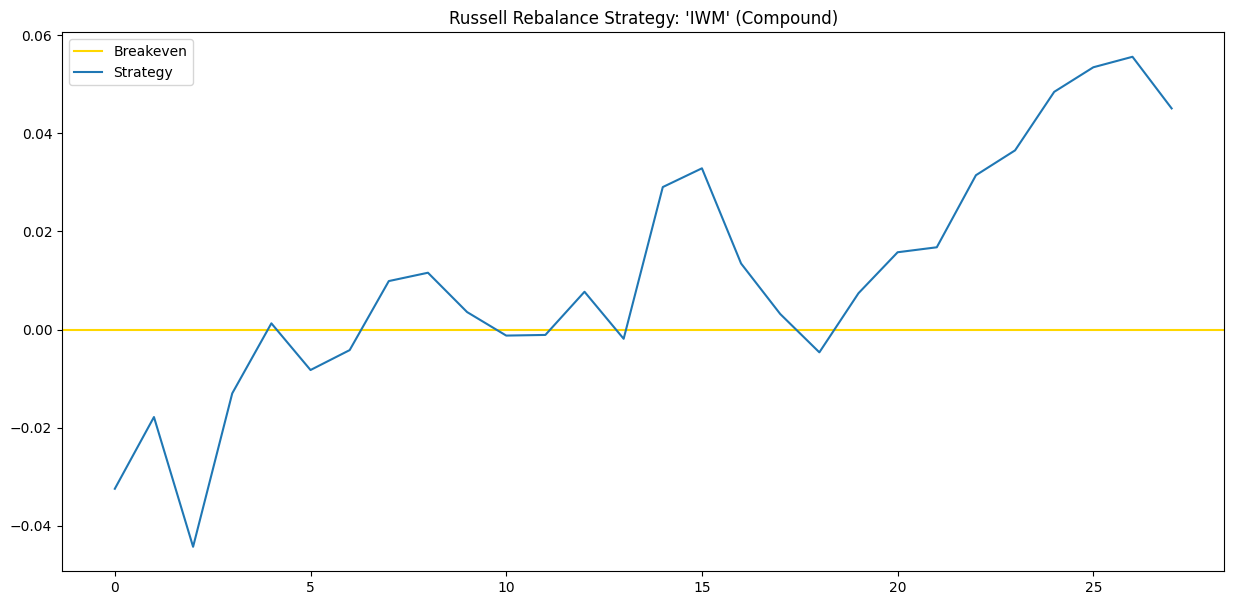

In [15]:
fig, ax = plt.subplots(ncols=1, sharey=1, figsize=(15, 7))

ax.axhline(y=0, label="Breakeven", color="gold")

ax.plot(data.loc[data["active"], "cum_strat_ret"].values, label="Strategy")
ax.set_title(f"Russell Rebalance Strategy: {TICKER!r} (Compound)")
ax.legend(loc="best")

plt.show()

## Describe Strategy Results

In [16]:
utils.describe(returns=data["strat_ret"], pos=data["active"], daily=True, asset=TICKER)

Asset                            IWM
Start                     2020-01-02
End                       2024-03-04
Mean Return                 0.16815%
Total Return                   4.51%
Median Return               0.28708%
1st Quartile               -0.87101%
3rd Quartile                1.18050%
Std Dev Return              1.48628%
CAGR                      15.750 bps
Trade CAGR                    0.552%
Ann. CAGR                    48.675%
Activity Ratio                 2.70%
Number of Trades                   8
Average Hold Period        3.50 Days
Daily Sharpe Ratio            0.1131
Ann. Sharpe Ratio              1.796
Adj. Ann. Sharpe Ratio        0.2951
Daily Sortino Ratio           0.1828
Ann. Sortino Ratio            0.4768
Daily Calmar Ratio            1.2409
Hit Ratio                     64.29%
Profit Factor                  1.34x
MDD                           -3.63%
MDD Start                 2022-06-24
MDD Bottom                2022-06-29
MDD End                   2023-06-27
M

In [17]:
utils.describe(returns=trade_ret, daily=False, asset=TICKER)

C:\Users\tomw1\PycharmProjects\quantified_strategies\quantified_strategies\strategy_utils.py:172: RuntimeWarning: divide by zero encountered in scalar divide
  calmar_ratio = tot_ret / drawdown_statistics["max_drawdown"]


Asset                             IWM
Start                      2020-06-23
End                        2023-06-23
Mean Return                  1.11599%
Total Return                    4.51%
Median Return                0.99910%
1st Quartile                -0.09391%
3rd Quartile                 2.32590%
Std Dev Return               1.49372%
CAGR                      110.773 bps
Trade CAGR                        N/A
Ann. CAGR                         N/A
Activity Ratio                100.00%
Number of Trades                  0.0
Average Hold Period         4.00 Days
Daily Sharpe Ratio             0.7471
Ann. Sharpe Ratio             11.8603
Adj. Ann. Sharpe Ratio        11.8603
Daily Sortino Ratio               NaN
Ann. Sortino Ratio                NaN
Daily Calmar Ratio               -inf
Hit Ratio                      75.00%
Profit Factor                  11.64x
MDD                             0.00%
MDD Start                  2020-06-23
MDD Bottom                 2020-06-23
MDD End     